In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 82.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.2/486.2 kB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 65.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 91.4 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:

from fastai.vision.all import *

In [3]:
path = untar_data(URLs.PETS)

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [5]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_195.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_30.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_132.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/havanese_118.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_51.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_173.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_185.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_129.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_202.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_165.jpg')...]

In [6]:
fname = (path/'images').ls()[0]

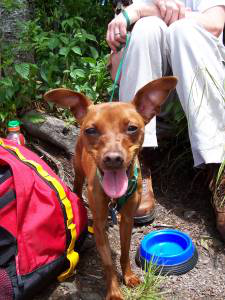

In [7]:
Image.open(fname)

In [8]:
re.findall(r'(.+)_\d+.jpg$',fname.name)

['miniature_pinscher']

In [9]:


pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms=Resize((460,460)),
                 batch_tfms=aug_transforms(size=224, min_scale=0.75))



In [10]:
!pip install fastai2==0.0.30


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.4/179.4 kB 4.8 MB/s eta 0:00:00


In [11]:
dls = pets.dataloaders(path/"images")

In [12]:
pets1 = DataBlock(
    blocks=(ImageBlock,CategoryBlock),
    get_items=get_image_files,
    splitter = RandomSplitter(seed=42),
    get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name')
)

In [13]:
pets1.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/american_bulldog_41.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=500x375
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/american_bulldog_41.jpg
    applying partial gives
      american_bulldog
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(12)

Final sample: (PILImage mode=RGB size=500x375, TensorCategory(12))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Set

RuntimeError: ignored

In [14]:
learn = vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 193MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.526442,0.317706,0.098106,01:30


epoch,train_loss,valid_loss,error_rate,time
0,0.538924,0.317633,0.100812,01:28
1,0.318587,0.205204,0.063599,01:43


In [15]:
x,y = dls.one_batch()
y

TensorCategory([21, 16, 32,  9,  2, 26, 13,  3,  9,  7, 15,  2, 27, 33,  7, 22, 22, 16, 30, 30, 13, 18, 24, 18,  2, 20,  1,  2, 11,  7, 32, 14, 10,  9, 36, 24, 16,  7, 10,  0,  0,  5, 34,  8, 14, 23,
                20, 23, 13, 26, 23, 29,  0, 15, 16, 11, 18, 25, 12, 31, 17, 19,  9,  7], device='cuda:0')

In [17]:
preds,_ = learn.get_preds(dl=[(x,y)])
preds[0]

tensor([2.3625e-08, 2.9709e-08, 1.8512e-06, 9.3390e-07, 1.1059e-06, 6.5880e-07, 2.3926e-07, 1.1388e-06, 3.7833e-06, 2.8635e-06, 4.1780e-07, 3.4492e-08, 2.0202e-05, 1.9288e-06, 2.5972e-05, 1.4043e-06,
        2.0661e-07, 2.5103e-07, 6.7666e-07, 4.1666e-06, 2.4954e-06, 9.9910e-01, 7.2295e-07, 9.4466e-07, 3.8568e-07, 3.7561e-05, 7.5645e-07, 4.8045e-05, 1.7548e-07, 1.9271e-07, 9.8903e-06, 7.2585e-04,
        3.8674e-07, 4.3168e-07, 6.8065e-06, 1.7143e-06, 3.0653e-08])

In [18]:
len(preds[0]), preds[0].sum()

(37, tensor(1.0000))

In [20]:
targ = tensor([0,1,0,1,1,0])
acts = torch.randn((6,2))*2

In [21]:
acts.sigmoid()

tensor([[0.0603, 0.7846],
        [0.0347, 0.3391],
        [0.2179, 0.7787],
        [0.7645, 0.9280],
        [0.1674, 0.0353],
        [0.9016, 0.1099]])

In [22]:
sm_acts = torch.softmax(acts,dim=1)
sm_acts

tensor([[0.0173, 0.9827],
        [0.0654, 0.9346],
        [0.0734, 0.9266],
        [0.2011, 0.7989],
        [0.8459, 0.1541],
        [0.9867, 0.0133]])

In [23]:
F.nll_loss(sm_acts,targ, reduction='none')

tensor([-0.0173, -0.9346, -0.0734, -0.7989, -0.1541, -0.9867])

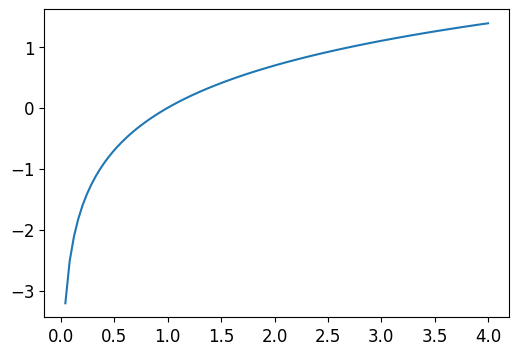

In [24]:
plot_function(torch.log,min=0,max=4)

In [25]:
loss_func = nn.CrossEntropyLoss()

In [26]:
loss_func(acts,targ)

tensor(1.4743)

In [27]:
nn.CrossEntropyLoss(reduction='none')(acts,targ)

tensor([4.0573, 0.0677, 2.6122, 0.2245, 1.8704, 0.0134])

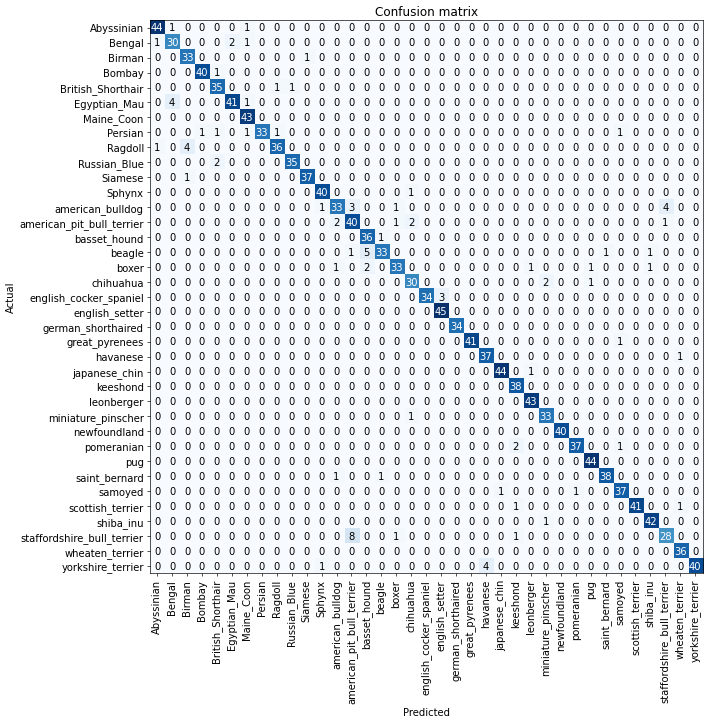

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [29]:
interp.most_confused(min_val=4)

[('staffordshire_bull_terrier', 'american_pit_bull_terrier', 8),
 ('beagle', 'basset_hound', 5),
 ('Egyptian_Mau', 'Bengal', 4),
 ('Ragdoll', 'Birman', 4),
 ('american_bulldog', 'staffordshire_bull_terrier', 4),
 ('yorkshire_terrier', 'havanese', 4)]

In [31]:
learn=vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1,base_lr=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.541550,5.081420,0.509472,01:31


epoch,train_loss,valid_loss,error_rate,time
0,3.451216,1.723882,0.512855,01:31


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


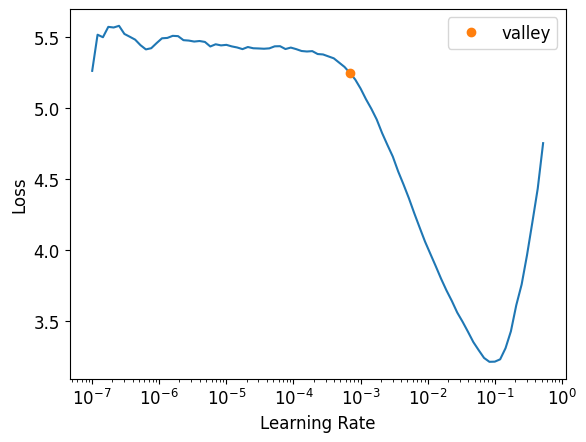

In [34]:
learn = vision_learner(dls,resnet34,metrics=error_rate)
lr_min = learn.lr_find()

In [37]:
print(f'Minimum/10: {lr_min}')

Minimum/10: SuggestedLRs(valley=0.0006918309954926372)


In [38]:
learn= vision_learner(dls,resnet34,metrics = error_rate)

learn.fine_tune(2, base_lr=3e-3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.279388,0.326017,0.103518,01:28


epoch,train_loss,valid_loss,error_rate,time
0,0.559256,0.365959,0.110284,01:37
1,0.340394,0.217189,0.069689,01:32


In [40]:
learn.fine_tune??


In [41]:
learn = vision_learner(dls,resnet34, metrics=error_rate)
learn.fit_one_cycle(3,3e-3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.154933,0.324165,0.100135,01:34
1,0.526054,0.267338,0.085927,01:45
2,0.329126,0.219213,0.067659,01:32


In [42]:
learn.unfreeze()

SuggestedLRs(valley=1.3182567499825382e-06)

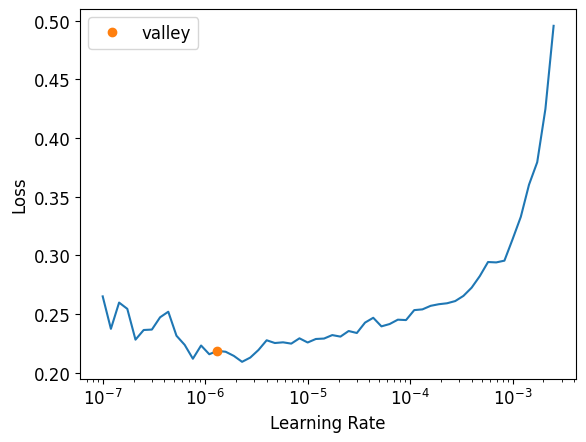

In [43]:
learn.lr_find()

In [44]:
learn.fit_one_cycle(6,lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.266600,0.211973,0.066982,01:34
1,0.254632,0.206939,0.062923,01:29
2,0.226631,0.210250,0.066982,01:33
3,0.203206,0.201035,0.065629,02:13
4,0.180244,0.197645,0.062923,01:34
5,0.179338,0.198983,0.064276,01:31


In [ ]:
learn = vision_learner(dls,resnet34,metrics=error_rate)

learn.fit_one_cycle(3,3e-3)
learn.unfreeze()
learn.fit_one_cycle(12, lr_max = slice(1e-6,1e-4))

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.168912,0.270357,0.083221,01:32
1,0.554101,0.243764,0.077131,01:28
2,0.323104,0.202884,0.062923,01:27


epoch,train_loss,valid_loss,error_rate,time
0,0.253189,0.198843,0.061570,01:32
1,0.256225,0.192564,0.061570,01:28
2,0.223436,0.191536,0.060217,01:32
3,0.213569,0.188713,0.063599,01:29
4,0.201683,0.184512,0.058863,01:50
5,0.182798,0.176665,0.057510,01:50
6,0.161148,0.176868,0.058863,01:30
7,0.144863,0.173380,0.054804,01:35
8,0.137179,0.172788,0.052097,01:31
9,0.132203,0.170516,0.052097,01:28


In [ ]:
learn.recorder.plot_loss()

In [ ]:
from fastai.callback.fp16 import *
learn = vision_learner(dls,resnet50,metrics=error_rate)

learn.fine_tune(6, freeze_epochs=3)

In [ ]:
learn.recorder.plot_loss()